In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# This is used for fast string concatination
from io import StringIO

# Use nltk for valid words
import nltk
# Need to make hash 'dictionaries' from nltk for fast processing
import collections as co


import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# change the directory path for the database according to the location of the csv file. 
data = pd.read_csv("/Users/dalyakhatun/Desktop/GSU/Data Mining/consumer_complaints.csv")


In [2]:
# Find the number of rows and columns 
data.shape

(746402, 18)

In [3]:
# display the dataset.
data.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [4]:
# Find the types of data for each column 
data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [5]:
# Display the header of each column in the dataset. 
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
# different products in the dataset
data.Product.unique()

array(['Consumer Loan', 'Bank account or service', 'Mortgage',
       'Debt collection', 'Credit card', 'Credit reporting',
       'Student loan', 'Money transfers', 'Payday loan', 'Prepaid card',
       'Other financial service', 'Virtual currency'], dtype=object)

In [7]:
# How many complaints raised against each product?
productAgainstComplaints = data.groupby('Product').size()
print(productAgainstComplaints)

Product
Bank account or service     84071
Consumer Loan               30446
Credit card                 86938
Credit reporting           134970
Debt collection            140678
Money transfers              5187
Mortgage                   223642
Other financial service       984
Payday loan                  5366
Prepaid card                 3672
Student loan                30431
Virtual currency               17
dtype: int64


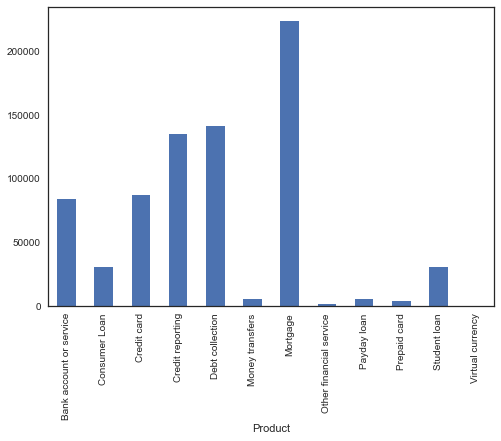

In [8]:

# This graphs shows the number of complaint against each product. 
productAgainstComplaints.plot(kind='bar')
plt.show()

In [9]:
# different companies in the dataset
data.Company.unique()

array(['Wells Fargo & Company', 'Santander Bank US',
       'Franklin Credit Management', ..., 'Benn Realty Services, Inc.',
       'Sibbett Auto Sales LLC', 'LN Capital Corporation'], dtype=object)

In [10]:
# How many complaints raised against each Company?
CompanyAgainstComplaints = data.groupby('Company').size()
print(CompanyAgainstComplaints)


Company
(Former)Shapiro, Swertfeger & Hasty, LLP         4
1 Stop Money Centers, LLC                        1
1st 2nd Mortgage Company Of NJ, Inc.             1
1st Alliance Lending                            17
1st Capital Finance of South Carolina, Inc.      1
1st Capital Mortgage, LLC                        1
1st Fidelity Loan Servicing                      5
1st Franklin Financial Corporation              54
1st Maryland Mortgage Corporation                1
1st Midwest Mortgage Corp                        2
1st Money Center, Inc.                           2
1st Portfolio Holding Corporation                1
1st Preference Mortgage                          2
1st Priority Mortgage, Inc.                      1
21st Mortgage Corporation                      311
2233 Paradise Road LLC                           8
2288984 Ontario Inc.                            30
24 Asset Management Corp                         5
245 Holdings LLC                                 1
360 Mortgage           

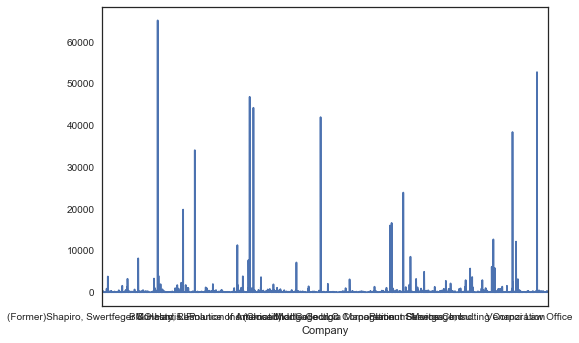

In [11]:

# This graphs show the number of complaint against each Company. 
CompanyAgainstComplaints.plot()
plt.show()

Timely response?
No      20926
Yes    725476
dtype: int64


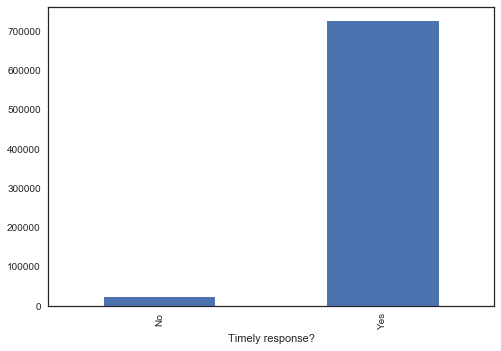

In [12]:
# How many complaints have received timely response? 
# Almost 97.5% of the complaints have been addressed timely. 

ReceivedTimelyResponse = data.groupby('Timely response?').size()
print(ReceivedTimelyResponse)
ReceivedTimelyResponse.plot(kind='bar')
plt.show()

Consumer disputed?
No     553302
Yes    145659
dtype: int64


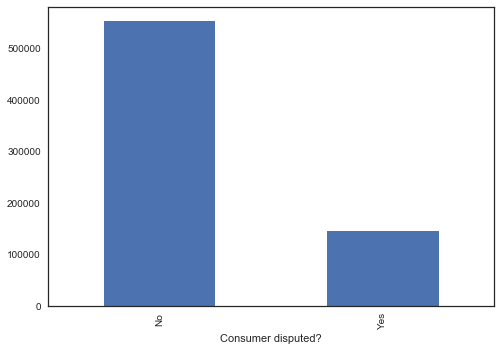

In [13]:
# How many consumer disputed? 
# Over 20% of the users disputed.
disputed = data.groupby('Consumer disputed?').size()
print(disputed)
disputed.plot(kind='bar')
plt.show()

Company response to consumer
Closed                              17170
Closed with explanation            555668
Closed with monetary relief         49769
Closed with non-monetary relief     92404
Closed with relief                   5298
Closed without relief               17863
In progress                          4182
Untimely response                    4048
dtype: int64


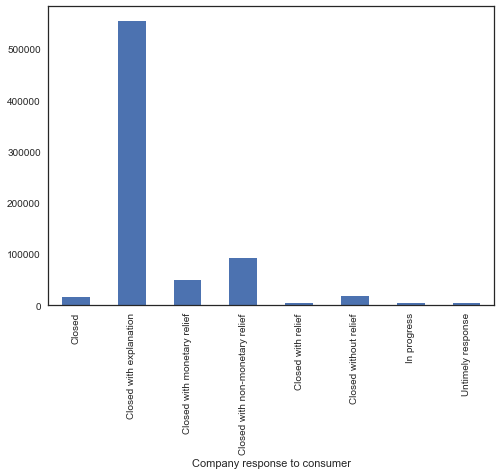

In [14]:
# What are the different responses users get from the companies? 
DifferentResponses = data.groupby('Company response to consumer').size()
print(DifferentResponses)
DifferentResponses.plot(kind='bar')
plt.show()

In [15]:
# Analyzing text in consumer complaints descriptions

In [16]:
# We are only interested in data with consumer complaints. 
# Only using the data where 'Consumer complaint narrative' is not null 

data=data[data['Consumer complaint narrative'].notnull()]

st=StringIO()
data['Consumer complaint narrative'].apply(lambda x: st.write(x))

k=st.getvalue()
st.close()
k=k.lower()
k=k.split()

In [17]:
# Next only want valid strings
words = co.Counter(nltk.corpus.words.words())
stopWords =co.Counter( nltk.corpus.stopwords.words() )
k=[i for i in k if i in words and i not in stopWords]
st=" ".join(k)
c = co.Counter(k)

In [18]:
# 30 most common words
c.most_common(30)

[('credit', 178714),
 ('account', 133512),
 ('would', 104821),
 ('loan', 89573),
 ('payment', 82255),
 ('bank', 79684),
 ('told', 79669),
 ('received', 66514),
 ('debt', 60481),
 ('information', 57717),
 ('never', 56824),
 ('mortgage', 56814),
 ('pay', 52764),
 ('get', 52073),
 ('company', 51348),
 ('card', 50917),
 ('report', 50731),
 ('sent', 49832),
 ('time', 49195),
 ('said', 45661),
 ('call', 45457),
 ('could', 45353),
 ('letter', 44021),
 ('back', 42456),
 ('made', 39802),
 ('due', 38320),
 ('phone', 37934),
 ('since', 37570),
 ('amount', 37012),
 ('money', 35419)]

In [19]:
st[0:100]

'one owe loan address box know longer use never even told credit report thats still address one vehic'

In [20]:
print(k[0:10],"\n\nLength of k %s" % len(k))


['one', 'owe', 'loan', 'address', 'box', 'know', 'longer', 'use', 'never', 'even'] 

Length of k 8133025


In [21]:
# Let's get some text involving identity theft
searchS='victim of identity theft'
vi = data[data['Consumer complaint narrative'].str.find(searchS) >= 0]
data['victim']=None
data['e']=1
data['m']=None  # This will be for 'Closed with monetary relief'
data['victim'] = data[data['Consumer complaint narrative'].str.find(searchS) >= 0]
data['m']=data[data['Company response to consumer'] == 'Closed with monetary relief']


# Take a look at some sample stories  mindex to mindex_inc
# Adjust this, to see different stories
mindex=20
mindex_inc=5+mindex
si=StringIO()
vi['Consumer complaint narrative'].iloc[mindex:mindex_inc].apply(lambda x: si.write(x+'\n___\n\n'))

t=si.getvalue()
si.close()
print(t)

I have been victim of identity theft XXXX times now in about XXXX years time. I have filed complaints with Consumer Fraud and with the Credit Bureaus. Latest issue is so many hard inquiries on my file by auto finance companies I did NOT give written or oral permission to. Wrote them all and asked for copy of credit authorization form they have that gave them permission. None have been able to send any because I never gave them permission. Only XXXX dealerships were authorized, XXXX XXXX in writing, and XXXX XXXX XXXX orally over the phone. Yet there are XXXX inquiries total on my file with XXXX credit bureau alone. I know one has a XXXX day window to shop around for auto financing, and it only shows as XXXX Hard Inquiry. This has always been the case all my life, yet this time with XXXX XXXX, almost all their companies they dealt with show as Hard Inquiries on my credit. My file is supposed to flagged due to the identity thefts, and yet they are allowing all these other entities to che

In [22]:
from wordcloud import WordCloud

# Read the whole text.
text = s

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="gray",max_words=len(k),max_font_size=50, relative_scaling=.8).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()                                                  

NameError: name 's' is not defined